# Computing Basic Statistics
Computing basic statistics on a dataset is an essential first step to understanding the data.  This notebook shows how you can compute basic statistics on a dataset.

In [1]:
import pandas as pd
import koleksyon.dta as dd
import koleksyon.lib as ll

In [2]:
#load an example dataset we have in the package
df = dd.load_parquet("../../data/melbourne/", "melbourne_")
df = df.fillna(-1)  #note, not the best way to impute missing data, that will be covered later
df

Number of Records Loaded: 34857


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,-1.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,-1.0,-1.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,-1.0,-1.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,-1.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,-1.0,-1.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,-1.0,-1.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,Maribyrnong City Council,-1.00000,-1.00000,Western Metropolitan,6543.0


The prefered method for looking at a single variable is to do a density plot as shown below:

Statistics for  Variable:	Landsize
Number of Data Points:	34857
Min:	-1.0
Max:	433014.0
Mean:	392.14120549674385
Mode:	-1.0
Variance:	2777.9466209889188
Excess kurtosis of normal distribution (should be 0):	17188.018934591004
Skewness of normal distribution (should be 0):	116.48289709109525



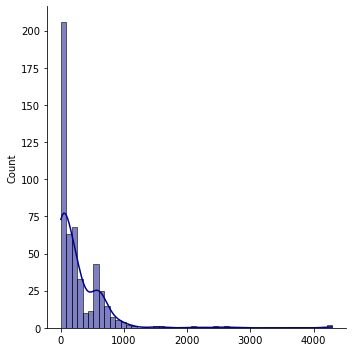

In [3]:
ll.var_analysis(df, "Landsize")

In [4]:
# If we just want the statistics, not the plot, do this:
dreport = ll.dist_report(df, "Landsize")
print(dreport)

Statistics for  Variable:	Landsize
Number of Data Points:	34857
Min:	-1.0
Max:	433014.0
Mean:	392.14120549674385
Mode:	-1.0
Variance:	2777.9466209889188
Excess kurtosis of normal distribution (should be 0):	17188.018934591004
Skewness of normal distribution (should be 0):	116.48289709109525



In [5]:
#each element can be accessed in the object returned as follows:
print("number = ", dreport.number)
print("min = ", dreport.min)
print("max = ", dreport.max)
print("mean = ", dreport.mean)
print("mode = ", dreport.mode)
print("variance = ", dreport.variance)
print("kurtosis = ", dreport.kurtosis)
print("skew = ", dreport.skew)

number =  34857
min =  -1.0
max =  433014.0
mean =  392.14120549674385
mode =  -1.0
variance =  2777.9466209889188
kurtosis =  17188.018934591004
skew =  116.48289709109525


# Table Statistics
To calculate simple statistics for all numeric data in the dataframe, we can use the calculate_summary_stats function like so:

In [6]:
statsdf = ll.calculate_summary_stats(df)
statsdf

,column name,number,min,max,mean,mode,variance,kurtosis,skew
0,Rooms,34857,1.00000,1.600000e+01,3.031012,3.0,0.969919,2.511176,0.499075
1,Price,34857,-1.00000,1.120000e+07,820898.686634,-1.0,714034.456632,7.858376,1.768967
2,Distance,34857,-1.00000,4.810000e+01,11.184580,11.2,6.789011,3.584817,1.503323
3,Postcode,34857,-1.00000,3.978000e+03,3115.973434,3073.0,110.291716,39.926499,3.236154
4,Bedroom2,34857,-1.00000,3.000000e+01,2.121755,3.0,1.934146,0.723203,-0.463342
5,Bathroom,34857,-1.00000,1.200000e+01,1.005365,1.0,1.281750,-0.229276,-0.277064
6,Car,34857,-1.00000,2.600000e+01,1.045558,2.0,1.470889,3.363949,0.404559
7,Landsize,34857,-1.00000,4.330140e+05,392.141205,-1.0,2777.946621,17188.018935,116.482897
8,BuildingArea,34857,-1.00000,4.451500e+04,62.573614,-1.0,263.977220,23091.479720,138.263342
9,YearBuilt,34857,-1.00000,2.106000e+03,876.234817,-1.0,977.741595,-1.949663,0.218647


# Group-by Semantics
Many times, we want the statistics for a given variable, A, grouped by another variable, B.  Most often, we assume that B is a categorical variable and not continuous. For example, if we wanted to look at the distribution of price by selling agent.  

In [20]:
def build_groupby_df(df, category, numeric):  # numeric variable, categorical variable
    count_col = category + " count"
    sum_col = category + " sum"
    df_copy = df.copy()  
    df_copy[category].fillna("-1", inplace=True)
    df_copy[category] = df_copy[category].astype("object")
    df_copy[numeric].fillna(-1, inplace=True)
    df_copy[count_col] = df_copy.groupby(by=[category])[category].transform("count")
    df_copy[sum_col] = df_copy.groupby(by=[category])[numeric].transform("sum")
    df_copy[category + " groupby"] = df_copy[category].apply(str) + "_(" + df_copy[count_col].apply(str) + "|" + df_copy[sum_col].apply(str) + ")"
    return df_copy
    
statsdf_groupby = css(df, "SellerG", "Price")
statsdf_groupby

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,SellerG count,SellerG sum,SellerG groupby
0,Abbotsford,68 Studley St,2,h,-1.0,SS,Jellis,3/09/2016,2.5,3067.0,...,-1.0,-1.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,3359,3.420200e+09,Jellis_(3359|3420199525.0)
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,-1.0,-1.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,897,6.508918e+08,Biggin_(897|650891790.0)
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,897,6.508918e+08,Biggin_(897|650891790.0)
3,Abbotsford,18/659 Victoria St,3,u,-1.0,VB,Rounds,4/02/2016,2.5,3067.0,...,-1.0,-1.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,9,4.529996e+06,Rounds_(9|4529996.0)
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,897,6.508918e+08,Biggin_(897|650891790.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,-1.0,-1.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,457,3.552932e+08,Jas_(457|355293242.0)
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,411,3.103868e+08,Sweeney_(411|310386758.0)
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,457,3.552932e+08,Jas_(457|355293242.0)
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,-1.0,-1.0,Maribyrnong City Council,-1.00000,-1.00000,Western Metropolitan,6543.0,2623,1.972577e+09,hockingstuart_(2623|1972577451.0)


In [18]:
def getGroupings(listVals, groupSize):
    '''
    Description: Get the groupings of size groupSize needed for boxplot from listVals
    @input:
        listVals: sorted list of values which will be used to create the groupings
        groupSize: size of each group used in boxplot (i.e. 20 MS DRGs)
    @return:
        groupOfN: a dictionary with starting index of each group as key and all elements of the group as value
                    i.e groupOfN.get(0) = ["470.0(1114|2009)", "871.0(632|4126)", ...]
    '''
    groupOfN={}
    currList=[]
    endIndex = 0
    for ix, val in enumerate(listVals):
        if (ix!=0) and (ix%groupSize==0):
            groupOfN[ix-groupSize] = currList
            endIndex = ix-1
            currList=[]
        currList.append(val)

    groupOfN[endIndex+1] = currList
    return groupOfN

In [21]:
category = "SellerG"
numeric = "Price"
groupdf = build_groupby_df(df, category, numeric)
calculated_column = category + " groupby"

In [22]:
categories = list(groupdf[calculated_column].value_counts().index)
categories

['Jellis_(3359|3420199525.0)',
 'Nelson_(3236|2791255527.0)',
 'Barry_(3235|2037938503.0)',
 'hockingstuart_(2623|1972577451.0)',
 'Marshall_(2027|2391431330.0)',
 'Ray_(1950|1337052192.0)',
 'Buxton_(1868|1760922736.0)',
 'Biggin_(897|650891790.0)',
 'Fletchers_(861|794409856.0)',
 'Woodards_(714|595814769.0)',
 'Brad_(701|503101111.0)',
 'McGrath_(602|501615749.0)',
 'Noel_(524|496832166.0)',
 'Greg_(519|502752656.0)',
 'RT_(516|536986335.0)',
 'Miles_(478|391280270.0)',
 'YPA_(473|243303640.0)',
 'Jas_(457|355293242.0)',
 'Harcourts_(447|294493277.0)',
 'Stockdale_(420|264015293.0)',
 'Hodges_(413|387257038.0)',
 'Gary_(413|336811069.0)',
 'Sweeney_(411|310386758.0)',
 'Kay_(360|402122390.0)',
 'Raine_(326|202420740.0)',
 'HAR_(309|162717082.0)',
 'RW_(273|173481762.0)',
 'Love_(269|158552546.0)',
 "O'Brien_(225|153159725.0)",
 'Village_(217|170719460.0)',
 'Williams_(203|189170274.0)',
 'Philip_(172|115764527.0)',
 'Douglas_(167|111782498.0)',
 'Chisholm_(166|135158204.0)',
 'Purpl

In [29]:
for i in range(len(groupdf)):
    rowdf = groupdf.iloc[i]
    print(rowdf[calculated_column])
    print(rowdf[numeric])
    group[rowdf[calculated_column]].append(rowdf[numeric])

Jellis_(3359|3420199525.0)
-1.0
Biggin_(897|650891790.0)
1480000.0
Biggin_(897|650891790.0)
1035000.0
Rounds_(9|4529996.0)
-1.0
Biggin_(897|650891790.0)
1465000.0
Biggin_(897|650891790.0)
850000.0
Nelson_(3236|2791255527.0)
1600000.0
Nelson_(3236|2791255527.0)
-1.0
Biggin_(897|650891790.0)
-1.0
Collins_(124|131881474.0)
-1.0
Jellis_(3359|3420199525.0)
941000.0
Nelson_(3236|2791255527.0)
1876000.0
Biggin_(897|650891790.0)
-1.0
Biggin_(897|650891790.0)
-1.0
Nelson_(3236|2791255527.0)
1636000.0
Jellis_(3359|3420199525.0)
1000000.0
Jellis_(3359|3420199525.0)
745000.0
Biggin_(897|650891790.0)
300000.0
Biggin_(897|650891790.0)
1097000.0
Dingle_(55|27735494.0)
542000.0
Biggin_(897|650891790.0)
-1.0
Biggin_(897|650891790.0)
760000.0
Purplebricks_(160|104617167.0)
481000.0
Jellis_(3359|3420199525.0)
700000.0
Nelson_(3236|2791255527.0)
1350000.0
Biggin_(897|650891790.0)
750000.0
Biggin_(897|650891790.0)
1985000.0
Biggin_(897|650891790.0)
500000.0
Biggin_(897|650891790.0)
1172500.0
Greg_(519|5027

900000.0
Buxton_(1868|1760922736.0)
1400000.0
Fletchers_(861|794409856.0)
-1.0
Tim_(29|32148998.0)
964000.0
Biggin_(897|650891790.0)
-1.0
Jellis_(3359|3420199525.0)
900500.0
Fletchers_(861|794409856.0)
-1.0
Fletchers_(861|794409856.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Buxton_(1868|1760922736.0)
1200000.0
Buxton_(1868|1760922736.0)
-1.0
Barry_(3235|2037938503.0)
830000.0
Buxton_(1868|1760922736.0)
-1.0
Jellis_(3359|3420199525.0)
1310000.0
Moonee_(82|63490496.0)
850000.0
Moonee_(82|63490496.0)
750000.0
Nelson_(3236|2791255527.0)
851000.0
Barry_(3235|2037938503.0)
-1.0
Nelson_(3236|2791255527.0)
848000.0
Moonee_(82|63490496.0)
806000.0
Nelson_(3236|2791255527.0)
1155000.0
Nelson_(3236|2791255527.0)
670000.0
Nelson_(3236|2791255527.0)
1200000.0
Nelson_(3236|2791255527.0)
636000.0
Nelson_(3236|2791255527.0)
655000.0
Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
680000.0
Nelson_(3236|2791255527.0)
-1.0
Moonee_(82|63490496.0)
1160000.0
Moonee_(82|63490496.0)
560000.0
Barry_(32

hockingstuart_(2623|1972577451.0)
1448000.0
Woodards_(714|595814769.0)
1400000.0
McGrath_(602|501615749.0)
520000.0
hockingstuart_(2623|1972577451.0)
820000.0
Woodards_(714|595814769.0)
740000.0
Buxton_(1868|1760922736.0)
895000.0
hockingstuart_(2623|1972577451.0)
-1.0
Woodards_(714|595814769.0)
1041000.0
hockingstuart_(2623|1972577451.0)
1430000.0
Buxton_(1868|1760922736.0)
910000.0
Buxton_(1868|1760922736.0)
2520000.0
Buxton_(1868|1760922736.0)
1860000.0
C21_(159|117306477.0)
1350000.0
hockingstuart_(2623|1972577451.0)
635000.0
Buxton_(1868|1760922736.0)
1280000.0
Woodards_(714|595814769.0)
1900000.0
hockingstuart_(2623|1972577451.0)
1230000.0
Buxton_(1868|1760922736.0)
1150000.0
hockingstuart_(2623|1972577451.0)
1200000.0
Buxton_(1868|1760922736.0)
900000.0
hockingstuart_(2623|1972577451.0)
1533000.0
Hodges_(413|387257038.0)
1545000.0
Hodges_(413|387257038.0)
1650000.0
Buxton_(1868|1760922736.0)
670000.0
Buxton_(1868|1760922736.0)
1486000.0
Buxton_(1868|1760922736.0)
1275000.0
Wooda

Gary_(413|336811069.0)
2730000.0
Nick_(104|140703968.0)
900000.0
hockingstuart_(2623|1972577451.0)
-1.0
Marshall_(2027|2391431330.0)
1962000.0
Hodges_(413|387257038.0)
3295888.0
Buxton_(1868|1760922736.0)
1205000.0
hockingstuart_(2623|1972577451.0)
375000.0
Buxton_(1868|1760922736.0)
-1.0
Buxton_(1868|1760922736.0)
756000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
800000.0
Buxton_(1868|1760922736.0)
-1.0
hockingstuart_(2623|1972577451.0)
4375000.0
Buxton_(1868|1760922736.0)
1036000.0
Hodges_(413|387257038.0)
2100000.0
Nick_(104|140703968.0)
1500000.0
Buxton_(1868|1760922736.0)
905500.0
Gary_(413|336811069.0)
1811000.0
HAR_(309|162717082.0)
2375000.0
Buxton_(1868|1760922736.0)
-1.0
Marshall_(2027|2391431330.0)
2275000.0
Buxton_(1868|1760922736.0)
1385000.0
RT_(516|536986335.0)
1601000.0
Nick_(104|140703968.0)
2020000.0
Buxton_(1868|1760922736.0)
1762000.0
Nick_(104|140703968.0)
2450000.0
Marshall_(2027|2391431330.0)
858000.0
Marshall_(2027|2391431330.0)
142700

435000.0
Ray_(1950|1337052192.0)
989000.0
Jellis_(3359|3420199525.0)
920000.0
Ray_(1950|1337052192.0)
450000.0
Stockdale_(420|264015293.0)
1172000.0
Jellis_(3359|3420199525.0)
1300000.0
Nelson_(3236|2791255527.0)
1330000.0
Barry_(3235|2037938503.0)
1245000.0
Barry_(3235|2037938503.0)
-1.0
Moonee_(82|63490496.0)
515000.0
hockingstuart_(2623|1972577451.0)
900000.0
RW_(273|173481762.0)
650000.0
Jellis_(3359|3420199525.0)
-1.0
Nelson_(3236|2791255527.0)
-1.0
Raine_(326|202420740.0)
1205000.0
Walshe_(62|34707492.0)
775000.0
Jellis_(3359|3420199525.0)
380000.0
Nelson_(3236|2791255527.0)
1095000.0
Nelson_(3236|2791255527.0)
680000.0
Nelson_(3236|2791255527.0)
711000.0
Raine_(326|202420740.0)
910000.0
Nelson_(3236|2791255527.0)
1186000.0
Brad_(701|503101111.0)
500000.0
Barry_(3235|2037938503.0)
-1.0
Nelson_(3236|2791255527.0)
1005000.0
Jellis_(3359|3420199525.0)
385000.0
Collins_(124|131881474.0)
656000.0
Ray_(1950|1337052192.0)
370000.0
Jellis_(3359|3420199525.0)
320000.0
Nelson_(3236|2791255

Nelson_(3236|2791255527.0)
-1.0
Jellis_(3359|3420199525.0)
1560000.0
Nelson_(3236|2791255527.0)
1678000.0
Nelson_(3236|2791255527.0)
-1.0
hockingstuart_(2623|1972577451.0)
570000.0
Kay_(360|402122390.0)
-1.0
Ray_(1950|1337052192.0)
820000.0
Gary_(413|336811069.0)
795000.0
Woodards_(714|595814769.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
Woodards_(714|595814769.0)
600000.0
hockingstuart_(2623|1972577451.0)
1295000.0
hockingstuart_(2623|1972577451.0)
1275000.0
Buxton_(1868|1760922736.0)
1620000.0
Marshall_(2027|2391431330.0)
510000.0
Gary_(413|336811069.0)
1647000.0
Ray_(1950|1337052192.0)
255000.0
hockingstuart_(2623|1972577451.0)
890000.0
Woodards_(714|595814769.0)
346000.0
Gary_(413|336811069.0)
860000.0
hockingstuart_(2623|1972577451.0)
586000.0
hockingstuart_(2623|1972577451.0)
772000.0
Jellis_(3359|3420199525.0)
1506000.0
Gary_(413|336811069.0)
675000.0
hockingstuart_(2623|1972577451.0)
525000.0
Ray_(1950|1337052192.0)
290000.0
hockingstuart_(2623|1972577451.0)
363000.0
Gary_(413|336811

Ray_(1950|1337052192.0)
1009000.0
Nelson_(3236|2791255527.0)
820000.0
Nelson_(3236|2791255527.0)
780000.0
Walshe_(62|34707492.0)
835500.0
Brad_(701|503101111.0)
707000.0
Ray_(1950|1337052192.0)
570000.0
RW_(273|173481762.0)
522500.0
hockingstuart_(2623|1972577451.0)
523000.0
Nelson_(3236|2791255527.0)
772000.0
Stockdale_(420|264015293.0)
460000.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
Raine_(326|202420740.0)
840000.0
Barry_(3235|2037938503.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
Raine_(326|202420740.0)
745000.0
Brad_(701|503101111.0)
520000.0
Brad_(701|503101111.0)
532500.0
hockingstuart_(2623|1972577451.0)
750000.0
Ray_(1950|1337052192.0)
815000.0
Brad_(701|503101111.0)
637000.0
hockingstuart_(2623|1972577451.0)
950000.0
hockingstuart_(2623|1972577451.0)
780000.0
Barry_(3235|2037938503.0)
-1.0
Jellis_(3359|3420199525.0)
830000.0
Jellis_(3359|3420199525.0)
860000.0
Ray_(1950|1337052192.0)
1172000.0
Nelson_(3236|2791255527.0)
-1.0
Barry

Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
1400000.0
Nelson_(3236|2791255527.0)
435000.0
Nelson_(3236|2791255527.0)
-1.0
Paul_(19|20469999.0)
1255000.0
Considine_(60|57482998.0)
370000.0
Nelson_(3236|2791255527.0)
-1.0
Barry_(3235|2037938503.0)
457000.0
Paul_(19|20469999.0)
1460000.0
Nelson_(3236|2791255527.0)
736000.0
Nelson_(3236|2791255527.0)
405000.0
Brad_(701|503101111.0)
450000.0
Nelson_(3236|2791255527.0)
740000.0
Brad_(701|503101111.0)
-1.0
Brad_(701|503101111.0)
691000.0
Rendina_(124|104918256.0)
370000.0
Jellis_(3359|3420199525.0)
-1.0
McDonald_(85|86227990.0)
2355000.0
Brad_(701|503101111.0)
1255000.0
Barry_(3235|2037938503.0)
1560000.0
Brad_(701|503101111.0)
-1.0
Barry_(3235|2037938503.0)
1330000.0
Nelson_(3236|2791255527.0)
1625000.0
Paul_(19|20469999.0)
1150000.0
Nelson_(3236|2791255527.0)
1560000.0
Barry_(3235|2037938503.0)
787000.0
Brad_(701|503101111.0)
-1.0
Barry_(3235|2037938503.0)
1085000.0
Joe_(1|1800000.0)
1800000.0
Nelson_(3236|2791255527.0)
36000

2000000.0
Jellis_(3359|3420199525.0)
1550000.0
Jellis_(3359|3420199525.0)
1625000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
480000.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
585000.0
Gary_(413|336811069.0)
1960000.0
Fletchers_(861|794409856.0)
1700000.0
Jellis_(3359|3420199525.0)
-1.0
hockingstuart_(2623|1972577451.0)
680000.0
Marshall_(2027|2391431330.0)
-1.0
Marshall_(2027|2391431330.0)
2225000.0
Marshall_(2027|2391431330.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
1220000.0
Marshall_(2027|2391431330.0)
1375000.0
Marshall_(2027|2391431330.0)
-1.0
Fletchers_(861|794409856.0)
920000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
Nelson_(3236|2791255527.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Fletchers_(861|794409856.0)
-1.0
hockingstuart_(2623|1972577451.0)
382000.0
Fletchers_(861|794409856.0)
545000.0
Noel_(524|496832166.0)
40500

Woodards_(714|595814769.0)
348000.0
Jellis_(3359|3420199525.0)
-1.0
Fletchers_(861|794409856.0)
320000.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
1189000.0
Marshall_(2027|2391431330.0)
610000.0
Marshall_(2027|2391431330.0)
-1.0
Nelson_(3236|2791255527.0)
575000.0
Nelson_(3236|2791255527.0)
600000.0
Jellis_(3359|3420199525.0)
492000.0
Marshall_(2027|2391431330.0)
891000.0
Noel_(524|496832166.0)
806000.0
Gary_(413|336811069.0)
-1.0
Jellis_(3359|3420199525.0)
1575000.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
1155000.0
Woodards_(714|595814769.0)
-1.0
Kay_(360|402122390.0)
-1.0
Nelson_(3236|2791255527.0)
2000000.0
Kay_(360|402122390.0)
-1.0
Marshall_(2027|2391431330.0)
500000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Kay_(360|402122390.0)
-1.0
Marshall_(2027|2391431330.0)
350000.0
Marshall_(2027|2391431330.0)
753000.0
RT_(516|536986335.0)
330000.0
Marshall_(2027|2391431330.0)
-1.0
Marshall_(2027|2391431330.0)
1420000.0
Noel_(5

Jellis_(3359|3420199525.0)
564000.0
Rendina_(124|104918256.0)
825000.0
Rendina_(124|104918256.0)
770000.0
Pagan_(56|16138972.0)
-1.0
Rendina_(124|104918256.0)
1135000.0
Nelson_(3236|2791255527.0)
975000.0
Rendina_(124|104918256.0)
812000.0
Nelson_(3236|2791255527.0)
1900000.0
Nelson_(3236|2791255527.0)
542000.0
Jellis_(3359|3420199525.0)
445000.0
Nelson_(3236|2791255527.0)
732000.0
Nelson_(3236|2791255527.0)
1260000.0
Nelson_(3236|2791255527.0)
1000000.0
Edward_(57|37642993.0)
1155000.0
Village_(217|170719460.0)
700000.0
Nelson_(3236|2791255527.0)
813500.0
Nelson_(3236|2791255527.0)
526000.0
Edward_(57|37642993.0)
790000.0
Edward_(57|37642993.0)
1365000.0
Nelson_(3236|2791255527.0)
700000.0
Nelson_(3236|2791255527.0)
370000.0
Nelson_(3236|2791255527.0)
1230000.0
Edward_(57|37642993.0)
312000.0
Rendina_(124|104918256.0)
1370000.0
Rendina_(124|104918256.0)
460000.0
Nelson_(3236|2791255527.0)
395000.0
Rendina_(124|104918256.0)
1001000.0
Nelson_(3236|2791255527.0)
850000.0
Edward_(57|37642

790000.0
Marshall_(2027|2391431330.0)
2250000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
587000.0
Marshall_(2027|2391431330.0)
1185000.0
Marshall_(2027|2391431330.0)
1550000.0
Gary_(413|336811069.0)
-1.0
Marshall_(2027|2391431330.0)
1837000.0
Marshall_(2027|2391431330.0)
-1.0
Buxton_(1868|1760922736.0)
1105000.0
Fletchers_(861|794409856.0)
-1.0
Abercromby's_(49|67366984.0)
-1.0
RT_(516|536986335.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
RT_(516|536986335.0)
2360000.0
Jellis_(3359|3420199525.0)
1253000.0
Woodards_(714|595814769.0)
1505000.0
Marshall_(2027|2391431330.0)
1500000.0
Buxton_(1868|1760922736.0)
-1.0
Ray_(1950|1337052192.0)
720000.0
hockingstuart_(2623|1972577451.0)
1400000.0
Ray_(1950|1337052192.0)
-1.0
J_(33|32162989.0)
720000.0
Ray_(1950|1337052192.0)
2210000.0
Barry_(3235|2037938503.0)
940000.0
Marshall_(2027|2391431330.0)
-1.0
McGrath_(602|501615749.0)
-1.0
Thomson_(104|61711974.0)
-1.0
Jellis_(3359|3420199525.0)


Brad_(701|503101111.0)
1130000.0
Woodards_(714|595814769.0)
730000.0
Nelson_(3236|2791255527.0)
-1.0
Barry_(3235|2037938503.0)
831000.0
Nelson_(3236|2791255527.0)
930000.0
Nelson_(3236|2791255527.0)
800000.0
Ray_(1950|1337052192.0)
1111000.0
Nelson_(3236|2791255527.0)
900000.0
Nelson_(3236|2791255527.0)
822500.0
Jellis_(3359|3420199525.0)
1400000.0
Brad_(701|503101111.0)
336000.0
Nelson_(3236|2791255527.0)
800000.0
Jellis_(3359|3420199525.0)
-1.0
Buxton_(1868|1760922736.0)
1224000.0
Buxton_(1868|1760922736.0)
1020000.0
O'Brien_(225|153159725.0)
1000000.0
Ray_(1950|1337052192.0)
380500.0
McGrath_(602|501615749.0)
930000.0
Woodards_(714|595814769.0)
1090000.0
McGrath_(602|501615749.0)
947500.0
Woodards_(714|595814769.0)
836000.0
Buxton_(1868|1760922736.0)
1417250.0
Buxton_(1868|1760922736.0)
980000.0
Hodges_(413|387257038.0)
1135000.0
Woodards_(714|595814769.0)
1110000.0
Buxton_(1868|1760922736.0)
950000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
750000.0


Brad_(701|503101111.0)
480000.0
Woodards_(714|595814769.0)
991000.0
Buxton_(1868|1760922736.0)
1242000.0
Buxton_(1868|1760922736.0)
665000.0
Fletchers_(861|794409856.0)
680000.0
Buxton_(1868|1760922736.0)
981000.0
hockingstuart_(2623|1972577451.0)
1100000.0
Buxton_(1868|1760922736.0)
876000.0
Buxton_(1868|1760922736.0)
875000.0
Ray_(1950|1337052192.0)
-1.0
Woodards_(714|595814769.0)
-1.0
Woodards_(714|595814769.0)
651000.0
Ray_(1950|1337052192.0)
802000.0
Ray_(1950|1337052192.0)
995000.0
Win_(29|24190998.0)
885000.0
Ray_(1950|1337052192.0)
881500.0
Ray_(1950|1337052192.0)
1380000.0
Buxton_(1868|1760922736.0)
1346000.0
Buxton_(1868|1760922736.0)
980000.0
Ray_(1950|1337052192.0)
900000.0
Woodards_(714|595814769.0)
782000.0
Buxton_(1868|1760922736.0)
580000.0
Woodards_(714|595814769.0)
-1.0
Buxton_(1868|1760922736.0)
665000.0
Buxton_(1868|1760922736.0)
-1.0
Ray_(1950|1337052192.0)
937500.0
Woodards_(714|595814769.0)
1080000.0
Ray_(1950|1337052192.0)
1000000.0
Woodards_(714|595814769.0)
80

Thomson_(104|61711974.0)
-1.0
RT_(516|536986335.0)
-1.0
Kay_(360|402122390.0)
-1.0
Jellis_(3359|3420199525.0)
2444000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
841000.0
hockingstuart_(2623|1972577451.0)
570000.0
hockingstuart_(2623|1972577451.0)
480000.0
hockingstuart_(2623|1972577451.0)
-1.0
Marshall_(2027|2391431330.0)
1310000.0
hockingstuart_(2623|1972577451.0)
1530000.0
Biggin_(897|650891790.0)
-1.0
Beller_(32|24545499.0)
365000.0
Dingle_(55|27735494.0)
560000.0
Gary_(413|336811069.0)
-1.0
hockingstuart_(2623|1972577451.0)
332000.0
Castran_(31|43730995.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
1300000.0
Beller_(32|24545499.0)
815000.0
Beller_(32|24545499.0)
765000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Gary_(413|336811069.0)
910000.0
Marshall_(2027|2391431330.0)
1450000.0
hockingstuart_(2623|1972577451.0)
-1.0
Marshal

Barry_(3235|2037938503.0)
310000.0
Nelson_(3236|2791255527.0)
613000.0
Stockdale_(420|264015293.0)
-1.0
Barry_(3235|2037938503.0)
779000.0
Stockdale_(420|264015293.0)
425000.0
Brace_(16|8838996.0)
585000.0
Ray_(1950|1337052192.0)
791000.0
Nelson_(3236|2791255527.0)
475000.0
Barry_(3235|2037938503.0)
420000.0
Love_(269|158552546.0)
500000.0
RW_(273|173481762.0)
950000.0
Stockdale_(420|264015293.0)
352000.0
Nelson_(3236|2791255527.0)
650000.0
Nelson_(3236|2791255527.0)
677500.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|2037938503.0)
730000.0
Barry_(3235|2037938503.0)
791000.0
Barry_(3235|2037938503.0)
905000.0
Ray_(1950|1337052192.0)
480000.0
hockingstuart_(2623|1972577451.0)
767000.0
hockingstuart_(2623|1972577451.0)
810000.0
Nelson_(3236|2791255527.0)
871000.0
hockingstuart_(2623|1972577451.0)
450000.0
hockingstuart_(2623|1972577451.0)
400000.0
Nelson_(3236|2791255527.0)
921500.0
Nelson_(3236|2791255527.0)
760000.0
Barry_(3235|2037938503.0)
596000.0
Ray_(1950|1337052192.0)
-1.0
hockin

Allens_(5|2213397.0)
-1.0
Williams_(203|189170274.0)
805000.0
Jellis_(3359|3420199525.0)
-1.0
Hodges_(413|387257038.0)
370000.0
Owen_(4|2904999.0)
360000.0
Buxton_(1868|1760922736.0)
310000.0
Marshall_(2027|2391431330.0)
2525000.0
hockingstuart_(2623|1972577451.0)
1036500.0
hockingstuart_(2623|1972577451.0)
627500.0
Kay_(360|402122390.0)
1072000.0
Biggin_(897|650891790.0)
425000.0
RT_(516|536986335.0)
-1.0
Jellis_(3359|3420199525.0)
330000.0
hockingstuart_(2623|1972577451.0)
450000.0
hockingstuart_(2623|1972577451.0)
550000.0
LITTLE_(75|37968986.0)
400000.0
Kay_(360|402122390.0)
-1.0
hockingstuart_(2623|1972577451.0)
1700000.0
Kay_(360|402122390.0)
613000.0
RT_(516|536986335.0)
1240000.0
Williams_(203|189170274.0)
832000.0
Kay_(360|402122390.0)
-1.0
Biggin_(897|650891790.0)
693000.0
Williams_(203|189170274.0)
551000.0
Biggin_(897|650891790.0)
740000.0
Kay_(360|402122390.0)
2285000.0
Marshall_(2027|2391431330.0)
3000000.0
Hodges_(413|387257038.0)
450000.0
Harrington_(34|30332498.0)
5150

Douglas_(167|111782498.0)
480000.0
Douglas_(167|111782498.0)
435000.0
Douglas_(167|111782498.0)
607000.0
Douglas_(167|111782498.0)
600000.0
Barry_(3235|2037938503.0)
560000.0
Barry_(3235|2037938503.0)
550000.0
Douglas_(167|111782498.0)
626800.0
Douglas_(167|111782498.0)
670000.0
Barry_(3235|2037938503.0)
571500.0
Douglas_(167|111782498.0)
315000.0
Biggin_(897|650891790.0)
345000.0
Douglas_(167|111782498.0)
590000.0
Douglas_(167|111782498.0)
630000.0
Barry_(3235|2037938503.0)
685000.0
hockingstuart_(2623|1972577451.0)
690000.0
Barry_(3235|2037938503.0)
605000.0
Sweeney_(411|310386758.0)
808000.0
Purplebricks_(160|104617167.0)
790000.0
Douglas_(167|111782498.0)
625000.0
Stockdale_(420|264015293.0)
600000.0
GL_(36|23595497.0)
650000.0
Barry_(3235|2037938503.0)
640000.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|2037938503.0)
736000.0
Barry_(3235|2037938503.0)
605000.0
Barry_(3235|2037938503.0)
422000.0
Calder_(13|5322996.0)
650000.0
GL_(36|23595497.0)
725000.0
Douglas_(167|111782498.0)
71

Woodards_(714|595814769.0)
345000.0
hockingstuart_(2623|1972577451.0)
775000.0
Jellis_(3359|3420199525.0)
2650000.0
Marshall_(2027|2391431330.0)
1330000.0
Castran_(31|43730995.0)
-1.0
Kay_(360|402122390.0)
2820000.0
hockingstuart_(2623|1972577451.0)
-1.0
Kay_(360|402122390.0)
-1.0
Jellis_(3359|3420199525.0)
810000.0
Marshall_(2027|2391431330.0)
-1.0
RT_(516|536986335.0)
3850000.0
Marshall_(2027|2391431330.0)
2840000.0
Kay_(360|402122390.0)
2700000.0
RT_(516|536986335.0)
-1.0
RT_(516|536986335.0)
-1.0
hockingstuart_(2623|1972577451.0)
515501.0
hockingstuart_(2623|1972577451.0)
611000.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Kay_(360|402122390.0)
4000000.0
Kay_(360|402122390.0)
-1.0
Jellis_(3359|3420199525.0)
405000.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
RT_(516|536986335.0)
-1.0
Abercromby's_(49|67366984.0)
-1.0
Kay_(360|402122390.0)
6250000.0
RT_(516|536986335.0)
4500000.0
Sotheby's_(18|29572493.0)


Nelson_(3236|2791255527.0)
625000.0
Barry_(3235|2037938503.0)
828000.0
Barry_(3235|2037938503.0)
676000.0
Nelson_(3236|2791255527.0)
1310000.0
Harrington_(34|30332498.0)
856000.0
Elite_(4|2691998.0)
-1.0
Jellis_(3359|3420199525.0)
410000.0
Nelson_(3236|2791255527.0)
580000.0
Nelson_(3236|2791255527.0)
675000.0
Re_(13|7263996.0)
-1.0
Jellis_(3359|3420199525.0)
1350000.0
Nelson_(3236|2791255527.0)
940000.0
Nelson_(3236|2791255527.0)
930000.0
Nelson_(3236|2791255527.0)
1495000.0
hockingstuart_(2623|1972577451.0)
-1.0
Woodards_(714|595814769.0)
1550000.0
Nelson_(3236|2791255527.0)
1815000.0
Woodards_(714|595814769.0)
905500.0
Nelson_(3236|2791255527.0)
1625000.0
Jellis_(3359|3420199525.0)
899000.0
Nelson_(3236|2791255527.0)
-1.0
Jellis_(3359|3420199525.0)
665000.0
Nelson_(3236|2791255527.0)
-1.0
Jellis_(3359|3420199525.0)
435000.0
Jellis_(3359|3420199525.0)
570000.0
Jellis_(3359|3420199525.0)
1900000.0
Greg_(519|502752656.0)
1080000.0
Nelson_(3236|2791255527.0)
1280000.0
Collins_(124|13188

-1.0
Ray_(1950|1337052192.0)
-1.0
hockingstuart_(2623|1972577451.0)
1100000.0
hockingstuart_(2623|1972577451.0)
1500000.0
Hodges_(413|387257038.0)
1470000.0
hockingstuart_(2623|1972577451.0)
1160000.0
hockingstuart_(2623|1972577451.0)
1100000.0
Woodards_(714|595814769.0)
820000.0
hockingstuart_(2623|1972577451.0)
690000.0
Woodards_(714|595814769.0)
1580000.0
Buxton_(1868|1760922736.0)
740000.0
Woodards_(714|595814769.0)
1420000.0
Woodards_(714|595814769.0)
975000.0
hockingstuart_(2623|1972577451.0)
1060000.0
Ray_(1950|1337052192.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Buxton_(1868|1760922736.0)
680000.0
Buxton_(1868|1760922736.0)
825000.0
Thomson_(104|61711974.0)
-1.0
Woodards_(714|595814769.0)
1430000.0
Buxton_(1868|1760922736.0)
-1.0
Barry_(3235|2037938503.0)
435000.0
Woodards_(714|595814769.0)
1370000.0
Fletchers_(861|794409856.0)
605000.0
Ray_(1950|1337052192.0)
1355000.0
Buxton_(1868|1760922736.0)
785000.0
Woodards_(714|595814769.0)
1420000.0
Ray_(1950|1337052192.0)
1610000.0
McGr

Moonee_(82|63490496.0)
900000.0
Nelson_(3236|2791255527.0)
1300000.0
Moonee_(82|63490496.0)
1250000.0
Moonee_(82|63490496.0)
-1.0
Moonee_(82|63490496.0)
760000.0
Nelson_(3236|2791255527.0)
690000.0
Nelson_(3236|2791255527.0)
1600000.0
RW_(273|173481762.0)
-1.0
RW_(273|173481762.0)
-1.0
Noel_(524|496832166.0)
1900000.0
Noel_(524|496832166.0)
-1.0
Ray_(1950|1337052192.0)
1911000.0
hockingstuart_(2623|1972577451.0)
1922000.0
hockingstuart_(2623|1972577451.0)
-1.0
Noel_(524|496832166.0)
1850000.0
RT_(516|536986335.0)
2000000.0
Marshall_(2027|2391431330.0)
700000.0
Jellis_(3359|3420199525.0)
1890000.0
Fletchers_(861|794409856.0)
1565000.0
Jellis_(3359|3420199525.0)
1630000.0
Noel_(524|496832166.0)
-1.0
Fletchers_(861|794409856.0)
-1.0
hockingstuart_(2623|1972577451.0)
800000.0
hockingstuart_(2623|1972577451.0)
-1.0
Noel_(524|496832166.0)
1025000.0
hockingstuart_(2623|1972577451.0)
-1.0
Fletchers_(861|794409856.0)
-1.0
Noel_(524|496832166.0)
-1.0
hockingstuart_(2623|1972577451.0)
1670000.0
B

Love_(269|158552546.0)
328000.0
Stockdale_(420|264015293.0)
543500.0
Collins_(124|131881474.0)
-1.0
Jellis_(3359|3420199525.0)
1200000.0
Nelson_(3236|2791255527.0)
330000.0
Harrington_(34|30332498.0)
846000.0
Nelson_(3236|2791255527.0)
-1.0
Woodards_(714|595814769.0)
1345000.0
Nelson_(3236|2791255527.0)
1802500.0
Nelson_(3236|2791255527.0)
1520000.0
Nelson_(3236|2791255527.0)
1625000.0
Collins_(124|131881474.0)
2555000.0
Jellis_(3359|3420199525.0)
-1.0
YPA_(473|243303640.0)
-1.0
Chambers_(17|19145500.0)
1055000.0
Collins_(124|131881474.0)
950000.0
Nelson_(3236|2791255527.0)
1100000.0
McDonald_(85|86227990.0)
1250000.0
Edward_(57|37642993.0)
615000.0
Nelson_(3236|2791255527.0)
668000.0
Biggin_(897|650891790.0)
953000.0
Rendina_(124|104918256.0)
-1.0
Nelson_(3236|2791255527.0)
603000.0
hockingstuart_(2623|1972577451.0)
940000.0
Nelson_(3236|2791255527.0)
1550000.0
Nelson_(3236|2791255527.0)
500000.0
Nelson_(3236|2791255527.0)
450000.0
Nelson_(3236|2791255527.0)
390000.0
Nelson_(3236|2791

Nelson_(3236|2791255527.0)
600000.0
Considine_(60|57482998.0)
955000.0
Barry_(3235|2037938503.0)
601000.0
Eview_(123|81541291.0)
755000.0
Stockdale_(420|264015293.0)
1400000.0
Brad_(701|503101111.0)
1005000.0
Jellis_(3359|3420199525.0)
860000.0
Eview_(123|81541291.0)
1306000.0
Brad_(701|503101111.0)
650000.0
Brad_(701|503101111.0)
-1.0
Frank_(85|77932587.0)
1250000.0
Nelson_(3236|2791255527.0)
648000.0
Barry_(3235|2037938503.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
Barry_(3235|2037938503.0)
2525000.0
Woodards_(714|595814769.0)
1615000.0
Ray_(1950|1337052192.0)
655000.0
Ray_(1950|1337052192.0)
1351000.0
buyMyplace_(12|13495998.0)
1205000.0
Ray_(1950|1337052192.0)
676000.0
Ray_(1950|1337052192.0)
1145000.0
Ray_(1950|1337052192.0)
1600000.0
Woodards_(714|595814769.0)
1840000.0
Buxton_(1868|1760922736.0)
1580000.0
Buxton_(1868|1760922736.0)
1300000.0
Buxton_(1868|1760922736.0)
2250000.0
Woodards_(714|595814769.0)
437500.0
Buxton_(1868|1760922736.0)
-1.0
hockingstuart_(2623|1972577451.0)
960

810000.0
Miles_(478|391280270.0)
1140000.0
Nelson_(3236|2791255527.0)
1003000.0
Christou_(1|-1.0)
-1.0
Miles_(478|391280270.0)
-1.0
Fletchers_(861|794409856.0)
1155000.0
Barry_(3235|2037938503.0)
-1.0
Ray_(1950|1337052192.0)
1193000.0
Barry_(3235|2037938503.0)
880000.0
Barry_(3235|2037938503.0)
826000.0
Barry_(3235|2037938503.0)
952000.0
Buckingham_(118|90272292.0)
677500.0
Buckingham_(118|90272292.0)
-1.0
LJ_(104|52417724.0)
761000.0
Barry_(3235|2037938503.0)
715000.0
Miles_(478|391280270.0)
932500.0
Barry_(3235|2037938503.0)
895000.0
Village_(217|170719460.0)
1435000.0
Greg_(519|502752656.0)
470000.0
Sweeney_(411|310386758.0)
502000.0
Village_(217|170719460.0)
-1.0
Jas_(457|355293242.0)
580000.0
Burnham_(68|38643491.0)
375000.0
Sweeney_(411|310386758.0)
650000.0
McGrath_(602|501615749.0)
815000.0
Biggin_(897|650891790.0)
970000.0
Village_(217|170719460.0)
-1.0
hockingstuart_(2623|1972577451.0)
1325000.0
Biggin_(897|650891790.0)
890000.0
hockingstuart_(2623|1972577451.0)
900000.0
Swee

Whiting_(40|25006491.0)
520000.0
Barry_(3235|2037938503.0)
640000.0
Edward_(57|37642993.0)
967000.0
Nelson_(3236|2791255527.0)
850000.0
Nelson_(3236|2791255527.0)
500000.0
Edward_(57|37642993.0)
535000.0
Jellis_(3359|3420199525.0)
758000.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
975000.0
Jellis_(3359|3420199525.0)
862000.0
Ray_(1950|1337052192.0)
965000.0
Barry_(3235|2037938503.0)
761000.0
Bells_(90|56553995.0)
520000.0
YPA_(473|243303640.0)
530000.0
Love_(269|158552546.0)
-1.0
Village_(217|170719460.0)
1020000.0
Jas_(457|355293242.0)
210000.0
Ray_(1950|1337052192.0)
750000.0
Harcourts_(447|294493277.0)
635000.0
Harcourts_(447|294493277.0)
410000.0
Harcourts_(447|294493277.0)
675000.0
Barry_(3235|2037938503.0)
880000.0
Stockdale_(420|264015293.0)
597500.0
Darren_(117|80998486.0)
640000.0
McGrath_(602|501615749.0)
280000.0
Jas_(457|355293242.0)
520000.0
Rendina_(124|104918256.0)
895000.0
Biggin_(897|650891790.0)
660000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(335

Buxton_(1868|1760922736.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Peter_(68|43829984.0)
690000.0
Jellis_(3359|3420199525.0)
1022000.0
RT_(516|536986335.0)
5510000.0
Kay_(360|402122390.0)
3335000.0
Fletchers_(861|794409856.0)
-1.0
Kay_(360|402122390.0)
560000.0
Fletchers_(861|794409856.0)
-1.0
Marshall_(2027|2391431330.0)
970000.0
Marshall_(2027|2391431330.0)
1790000.0
Jellis_(3359|3420199525.0)
805000.0
Jellis_(3359|3420199525.0)
780000.0
Jellis_(3359|3420199525.0)
1875000.0
RT_(516|536986335.0)
2320000.0
Jellis_(3359|3420199525.0)
1237000.0
Jellis_(3359|3420199525.0)
1465000.0
Philip_(172|115764527.0)
701000.0
Fletchers_(861|794409856.0)
850000.0
Barry_(3235|2037938503.0)
-1.0
Philip_(172|115764527.0)
-1.0
Miles_(478|391280270.0)
885000.0
Ray_(1950|1337052192.0)
710000.0
Buxton_(1868|1760922736.0)
-1.0
Buxton_(1868|1760922736.0)
1190000.0
Brad_(701|503101111.0)
485000.0
Ray_(1950|1337052192.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
YPA_(473|243303640.0)
520000.0
hockingstuart_(2623|19725

1171000.0
C21_(159|117306477.0)
-1.0
Miles_(478|391280270.0)
2270000.0
Jellis_(3359|3420199525.0)
1875000.0
Caine_(41|45253986.0)
1350000.0
Biggin_(897|650891790.0)
1460000.0
Biggin_(897|650891790.0)
550000.0
Gary_(413|336811069.0)
-1.0
Barry_(3235|2037938503.0)
840000.0
Barry_(3235|2037938503.0)
1065000.0
Morrison_(113|90005001.0)
880000.0
Morrison_(113|90005001.0)
977500.0
Morrison_(113|90005001.0)
755000.0
Mason_(13|8825500.0)
810000.0
Morrison_(113|90005001.0)
861000.0
Biggin_(897|650891790.0)
-1.0
hockingstuart_(2623|1972577451.0)
810000.0
Purplebricks_(160|104617167.0)
580000.0
Chisholm_(166|135158204.0)
1255000.0
Domain_(19|15059999.0)
550000.0
Hodges_(413|387257038.0)
543000.0
Castran_(31|43730995.0)
1950000.0
McGrath_(602|501615749.0)
-1.0
Purplebricks_(160|104617167.0)
660000.0
Harcourts_(447|294493277.0)
547000.0
YPA_(473|243303640.0)
680000.0
Ray_(1950|1337052192.0)
568000.0
Harcourts_(447|294493277.0)
680000.0
hockingstuart_(2623|1972577451.0)
350000.0
Barry_(3235|20379385

Woodards_(714|595814769.0)
-1.0
HAR_(309|162717082.0)
-1.0
Sell_(7|5977999.0)
525000.0
Jellis_(3359|3420199525.0)
555000.0
Fletchers_(861|794409856.0)
-1.0
Jellis_(3359|3420199525.0)
3100000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
1381000.0
Marshall_(2027|2391431330.0)
2260000.0
Nelson_(3236|2791255527.0)
-1.0
Jellis_(3359|3420199525.0)
1000000.0
Nelson_(3236|2791255527.0)
720000.0
Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
1717500.0
Woodards_(714|595814769.0)
2400000.0
Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
1950000.0
C21_(159|117306477.0)
817500.0
Gary_(413|336811069.0)
-1.0
RW_(273|173481762.0)
1150000.0
Mitchell_(2|1350000.0)
590000.0
Harcourts_(447|294493277.0)
600000.0
Ray_(1950|1337052192.0)
-1.0
Gary_(413|336811069.0)
811000.0
Marshall_(2027|2391431330.0)
1520000.0
Gary_(413|336811069.0)
1700000.0
RT_(516|536986335.0)
960000.0
Buxton_(1868|1760922736.0)
732000.0
Buxton_(1868|1760922736.0)
800000.0
Ray_(1950|1337052192.0)

hockingstuart_(2623|1972577451.0)
1940000.0
Jellis_(3359|3420199525.0)
1590000.0
Fletchers_(861|794409856.0)
725000.0
Fletchers_(861|794409856.0)
-1.0
Fletchers_(861|794409856.0)
2367000.0
Marshall_(2027|2391431330.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Biggin_(897|650891790.0)
705000.0
McGrath_(602|501615749.0)
610000.0
Ray_(1950|1337052192.0)
2200000.0
Hodges_(413|387257038.0)
-1.0
Miles_(478|391280270.0)
736500.0
Haughton_(40|28918998.0)
780000.0
Gary_(413|336811069.0)
420000.0
Gary_(413|336811069.0)
1479000.0
Woodards_(714|595814769.0)
1199000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
1350000.0
Woodards_(714|595814769.0)
1767000.0
Buxton_(1868|1760922736.0)
1350000.0
Hodges_(413|387257038.0)
-1.0
hockingstuart_(2623|1972577451.0)
890000.0
hockingstuart_(2623|1972577451.0)
1655000.0
Buxton_(1868|1760922736.0)
1160000.0
Buxton_(1868|1760922736.0)
1430000.0
Buxton_(1868|1760922736.0)
1300000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(26

Barry_(3235|2037938503.0)
705000.0
Stockdale_(420|264015293.0)
550000.0
Harcourts_(447|294493277.0)
760000.0
YPA_(473|243303640.0)
630000.0
Harcourts_(447|294493277.0)
740000.0
McGrath_(602|501615749.0)
745000.0
Harcourts_(447|294493277.0)
-1.0
Jellis_(3359|3420199525.0)
1225000.0
McGrath_(602|501615749.0)
1400000.0
Kay_(360|402122390.0)
2900000.0
Kay_(360|402122390.0)
-1.0
RW_(273|173481762.0)
533000.0
Sweeney_(411|310386758.0)
390000.0
Barry_(3235|2037938503.0)
555000.0
YPA_(473|243303640.0)
695000.0
Harcourts_(447|294493277.0)
575000.0
Harcourts_(447|294493277.0)
-1.0
John_(1|-1.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
Harcourts_(447|294493277.0)
-1.0
Miles_(478|391280270.0)
1256000.0
Miles_(478|391280270.0)
870000.0
Ray_(1950|1337052192.0)
790000.0
Barry_(3235|2037938503.0)
820000.0
Fletchers_(861|794409856.0)
1050000.0
Philip_(172|115764527.0)
-1.0
Buckingham_(118|90272292.0)
734000.0
Barry_(3235|2037938503.0)
710000.0
Barry_(3235|2037938503.0)
705000.0
YPA_(473|243303640.0)

Buxton_(1868|1760922736.0)
2150000.0
Hodges_(413|387257038.0)
-1.0
Buxton_(1868|1760922736.0)
1680000.0
Hodges_(413|387257038.0)
890000.0
YPA_(473|243303640.0)
616000.0
Ray_(1950|1337052192.0)
632000.0
Nelson_(3236|2791255527.0)
1310000.0
Nelson_(3236|2791255527.0)
1615000.0
Nelson_(3236|2791255527.0)
560000.0
Jellis_(3359|3420199525.0)
1500000.0
Jellis_(3359|3420199525.0)
870000.0
Barry_(3235|2037938503.0)
717000.0
Jellis_(3359|3420199525.0)
1751000.0
Jellis_(3359|3420199525.0)
1200000.0
Barry_(3235|2037938503.0)
1580000.0
Keatings_(3|2932500.0)
535000.0
Morrison_(113|90005001.0)
685000.0
Ray_(1950|1337052192.0)
685000.0
Barry_(3235|2037938503.0)
725000.0
Barry_(3235|2037938503.0)
505000.0
Barry_(3235|2037938503.0)
1300000.0
Barry_(3235|2037938503.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
Ray_(1950|1337052192.0)
1253000.0
Biggin_(897|650891790.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
McGrath_(602|501615749.0)
1170000.0
Marshall_(2027|2391431330.0)
1400000.0
Fletchers_(861|794409856.0)
13900

Nelson_(3236|2791255527.0)
835000.0
Barry_(3235|2037938503.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
buyMyplace_(12|13495998.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
Ray_(1950|1337052192.0)
900000.0
Darren_(117|80998486.0)
710000.0
Oriental_(4|2177998.0)
-1.0
Oriental_(4|2177998.0)
-1.0
McGrath_(602|501615749.0)
1320000.0
Jellis_(3359|3420199525.0)
-1.0
Better_(1|480000.0)
480000.0
Ray_(1950|1337052192.0)
1840000.0
Ray_(1950|1337052192.0)
430000.0
YPA_(473|243303640.0)
525000.0
O'Brien_(225|153159725.0)
495000.0
Harcourts_(447|294493277.0)
403500.0
Ray_(1950|1337052192.0)
1550000.0
hockingstuart_(2623|1972577451.0)
361000.0
Jellis_(3359|3420199525.0)
960000.0
Ray_(1950|1337052192.0)
1130000.0
Harcourts_(447|294493277.0)
696000.0
Buxton_(1868|1760922736.0)
1115000.0
Buxton_(1868|1760922736.0)
1950000.0
Ray_(1950|1337052192.0)
-1.0
C21_(159|117306477.0)
962000.0
O'Brien_(225|153159725.0)
-1.0
Nelson_(3236|2791255527.0)
900000.0
Jellis_(3359|3420199525.0)
365000.0
Barry_(3235|2037938503.0)
-1.0
Ra

Brad_(701|503101111.0)
777000.0
Barry_(3235|2037938503.0)
880000.0
Nelson_(3236|2791255527.0)
591000.0
Fletchers_(861|794409856.0)
-1.0
Ray_(1950|1337052192.0)
565000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
362000.0
PRDNationwide_(24|8755997.0)
330000.0
Harcourts_(447|294493277.0)
798000.0
Love_(269|158552546.0)
560000.0
hockingstuart_(2623|1972577451.0)
447000.0
HAR_(309|162717082.0)
900000.0
Miles_(478|391280270.0)
-1.0
Ray_(1950|1337052192.0)
910000.0
Ray_(1950|1337052192.0)
710000.0
Sweeney_(411|310386758.0)
670000.0
Biggin_(897|650891790.0)
681000.0
Sweeney_(411|310386758.0)
1005000.0
Burnham_(68|38643491.0)
468000.0
Sweeney_(411|310386758.0)
650000.0
Fletchers_(861|794409856.0)
1638000.0
hockingstuart_(2623|1972577451.0)
-1.0
Biggin_(897|650891790.0)
640000.0
hockingstuart_(2623|1972577451.0)
1380000.0
Raine_(326|202420740.0)
410000.0
YPA_(473|243303640.0)
420000.0
Whiting_(40|25006491.0)
510000.0
Greg_(519|502752656.0)
-1.0
Barry_(3235|20379385

Barry_(3235|2037938503.0)
-1.0
Stockdale_(420|264015293.0)
725000.0
Ray_(1950|1337052192.0)
813000.0
Hodges_(413|387257038.0)
545000.0
Woodards_(714|595814769.0)
1300000.0
Considine_(60|57482998.0)
1260000.0
Jellis_(3359|3420199525.0)
921000.0
McGrath_(602|501615749.0)
1250000.0
Woodards_(714|595814769.0)
840000.0
Ray_(1950|1337052192.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
hockingstuart_(2623|1972577451.0)
1350000.0
Nelson_(3236|2791255527.0)
541000.0
Rendina_(124|104918256.0)
565000.0
Brad_(701|503101111.0)
840000.0
Barry_(3235|2037938503.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
940000.0
Ray_(1950|1337052192.0)
942000.0
hockingstuart_(2623|1972577451.0)
620000.0
Reliance_(51|20239986.0)
-1.0
Ray_(1950|1337052192.0)
-1.0
YPA_(473|243303640.0)
801000.0
Marshall_(2027|2391431330.0)
1722500.0
Chisholm_(166|135158204.0)
2730000.0
Frank_(85|77932587.0)
1030000.0
hockingstuart_(2623|1972577451.0)
520000.0
Hodges_(413|387257038.0)
-1.0
McGrath_(602|501

Nelson_(3236|2791255527.0)
523000.0
Nelson_(3236|2791255527.0)
762000.0
Jellis_(3359|3420199525.0)
1695000.0
Jellis_(3359|3420199525.0)
1480000.0
Jellis_(3359|3420199525.0)
1120000.0
Kay_(360|402122390.0)
-1.0
Jellis_(3359|3420199525.0)
2368000.0
Jellis_(3359|3420199525.0)
1380000.0
Collins_(124|131881474.0)
575000.0
Philip_(172|115764527.0)
1755000.0
Barry_(3235|2037938503.0)
926000.0
Max_(20|13831997.0)
1120000.0
Barry_(3235|2037938503.0)
575000.0
Barry_(3235|2037938503.0)
1165000.0
Noel_(524|496832166.0)
-1.0
Gary_(413|336811069.0)
655000.0
Miles_(478|391280270.0)
-1.0
Miles_(478|391280270.0)
985000.0
Nelson_(3236|2791255527.0)
376000.0
Raine_(326|202420740.0)
-1.0
Raine_(326|202420740.0)
570000.0
Barry_(3235|2037938503.0)
515000.0
Hodges_(413|387257038.0)
1875000.0
hockingstuart_(2623|1972577451.0)
1137000.0
Kay_(360|402122390.0)
-1.0
hockingstuart_(2623|1972577451.0)
1750000.0
Williams_(203|189170274.0)
860000.0
Jellis_(3359|3420199525.0)
-1.0
Sweeney_(411|310386758.0)
1150000.0
i

YPA_(473|243303640.0)
510000.0
Brad_(701|503101111.0)
498500.0
Brad_(701|503101111.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
Jas_(457|355293242.0)
680000.0
Douglas_(167|111782498.0)
770000.0
Douglas_(167|111782498.0)
355000.0
Barry_(3235|2037938503.0)
-1.0
Noel_(524|496832166.0)
1571000.0
Fletchers_(861|794409856.0)
-1.0
Marshall_(2027|2391431330.0)
3625000.0
Ross_(13|7112493.0)
1815000.0
Nelson_(3236|2791255527.0)
-1.0
Fletchers_(861|794409856.0)
-1.0
Barry_(3235|2037938503.0)
580000.0
Reliance_(51|20239986.0)
-1.0
Barry_(3235|2037938503.0)
840000.0
Barry_(3235|2037938503.0)
762000.0
Nelson_(3236|2791255527.0)
760000.0
Barry_(3235|2037938503.0)
1065000.0
Nelson_(3236|2791255527.0)
-1.0
Barry_(3235|2037938503.0)
1585000.0
Walshe_(62|34707492.0)
448000.0
HAR_(309|162717082.0)
931000.0
Ray_(1950|1337052192.0)
467000.0
McGrath_(602|501615749.0)
800000.0
McGrath_(602|501615749.0)
1530000.0
The_(24|19065995.0)
1545000.0
Jellis_(3359|3420199525.0)
-1.0
RT_(516|536986335.0)
-1.0
Jellis_(3359|342

hockingstuart_(2623|1972577451.0)
486000.0
hockingstuart_(2623|1972577451.0)
995000.0
Barry_(3235|2037938503.0)
950000.0
hockingstuart_(2623|1972577451.0)
792000.0
Thomson_(104|61711974.0)
525000.0
Buxton_(1868|1760922736.0)
640000.0
Barry_(3235|2037938503.0)
590000.0
Marshall_(2027|2391431330.0)
660000.0
Ray_(1950|1337052192.0)
445000.0
Ray_(1950|1337052192.0)
475000.0
HAR_(309|162717082.0)
675000.0
Ray_(1950|1337052192.0)
546000.0
Love_(269|158552546.0)
721000.0
Ray_(1950|1337052192.0)
492000.0
Darren_(117|80998486.0)
715000.0
Ray_(1950|1337052192.0)
657000.0
Love_(269|158552546.0)
900000.0
HAR_(309|162717082.0)
650000.0
Noel_(524|496832166.0)
1120000.0
Noel_(524|496832166.0)
961000.0
Noel_(524|496832166.0)
-1.0
Fletchers_(861|794409856.0)
910000.0
Noel_(524|496832166.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
Philip_(172|115764527.0)
990000.0
Jellis_(3359|3420199525.0)
-1.0
Marshall_(2027|2391431330.0)
1580000.0
Marshall_(2027|2391431330.0)
2500000.0
Lindellas_(35|50665600.0)
940000.0
M

Barry_(3235|2037938503.0)
478000.0
Ray_(1950|1337052192.0)
635000.0
Reliance_(51|20239986.0)
520000.0
LJ_(104|52417724.0)
600000.0
Woodards_(714|595814769.0)
-1.0
Jellis_(3359|3420199525.0)
1200000.0
Buxton_(1868|1760922736.0)
455000.0
Miles_(478|391280270.0)
1302000.0
Miles_(478|391280270.0)
-1.0
Nelson_(3236|2791255527.0)
722000.0
Stockdale_(420|264015293.0)
650000.0
Stockdale_(420|264015293.0)
435000.0
Barry_(3235|2037938503.0)
715000.0
Prof._(60|37468496.0)
756001.0
Nelson_(3236|2791255527.0)
981000.0
Jellis_(3359|3420199525.0)
1295000.0
Nelson_(3236|2791255527.0)
1250000.0
Nelson_(3236|2791255527.0)
986000.0
Nelson_(3236|2791255527.0)
620000.0
Nelson_(3236|2791255527.0)
865000.0
Jellis_(3359|3420199525.0)
1206000.0
Edward_(57|37642993.0)
841000.0
hockingstuart_(2623|1972577451.0)
2536000.0
Jellis_(3359|3420199525.0)
901000.0
Jellis_(3359|3420199525.0)
1610000.0
Jellis_(3359|3420199525.0)
1005000.0
Nelson_(3236|2791255527.0)
575000.0
Jellis_(3359|3420199525.0)
2180000.0
Marshall_(2

680000.0
Barry_(3235|2037938503.0)
784000.0
Nelson_(3236|2791255527.0)
790000.0
Biggin_(897|650891790.0)
600000.0
Barry_(3235|2037938503.0)
630000.0
Nelson_(3236|2791255527.0)
601000.0
Nelson_(3236|2791255527.0)
900000.0
Eric_(3|1034999.0)
680000.0
Edward_(57|37642993.0)
1010000.0
Nelson_(3236|2791255527.0)
1023000.0
Edward_(57|37642993.0)
411500.0
Sweeney_(411|310386758.0)
1035000.0
Jellis_(3359|3420199525.0)
2450000.0
Kelly_(6|9449999.0)
2600000.0
Jellis_(3359|3420199525.0)
2855000.0
Jellis_(3359|3420199525.0)
955000.0
Jellis_(3359|3420199525.0)
1130000.0
Nelson_(3236|2791255527.0)
1600000.0
Jellis_(3359|3420199525.0)
1350000.0
Kay_(360|402122390.0)
2500000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
1630000.0
Marshall_(2027|2391431330.0)
1875000.0
Marshall_(2027|2391431330.0)
-1.0
Kay_(360|402122390.0)
-1.0
Area_(12|7966250.0)
770000.0
Barry_(3235|2037938503.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
Calder_(13|5322996.0)
-1.0
Ray_(1950|1337052192.0)
660000.0


Stockdale_(420|264015293.0)
825000.0
Biggin_(897|650891790.0)
600000.0
Jellis_(3359|3420199525.0)
1750000.0
Bells_(90|56553995.0)
450000.0
Barry_(3235|2037938503.0)
397000.0
Fletchers_(861|794409856.0)
-1.0
Fletchers_(861|794409856.0)
1370000.0
Barry_(3235|2037938503.0)
850000.0
Barry_(3235|2037938503.0)
-1.0
Fletchers_(861|794409856.0)
1150000.0
hockingstuart_(2623|1972577451.0)
303500.0
Buxton_(1868|1760922736.0)
1100000.0
Gary_(413|336811069.0)
780000.0
Buckingham_(118|90272292.0)
1060000.0
Buckingham_(118|90272292.0)
905000.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
RT_(516|536986335.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Quinta_(1|580000.0)
580000.0
Barry_(3235|2037938503.0)
620000.0
Love_(269|158552546.0)
402500.0
hockingstuart_(2623|1972577451.0)
595000.0
hockingstuart_(2623|1972577451.0)
569000.0
Barry_(3235|2037938503.0)
810000.0
Edward_(57|37642993.0)
500000.0
Barry_(3235|2037938503.0)
2335000.0
Nelson_(3236|2791255527.0)
1240000.0
Frank_(85|77932587.0

Buxton_(1868|1760922736.0)
865000.0
Hodges_(413|387257038.0)
1288000.0
Buxton_(1868|1760922736.0)
1323000.0
Ray_(1950|1337052192.0)
990000.0
Win_(29|24190998.0)
765000.0
Woodards_(714|595814769.0)
891500.0
Win_(29|24190998.0)
1100000.0
Barry_(3235|2037938503.0)
785000.0
Ray_(1950|1337052192.0)
877500.0
Fletchers_(861|794409856.0)
955000.0
Collins_(124|131881474.0)
1746000.0
Nelson_(3236|2791255527.0)
600000.0
Ray_(1950|1337052192.0)
-1.0
Nelson_(3236|2791255527.0)
920000.0
Nelson_(3236|2791255527.0)
-1.0
hockingstuart_(2623|1972577451.0)
800000.0
Jellis_(3359|3420199525.0)
-1.0
Barry_(3235|2037938503.0)
730000.0
Walshe_(62|34707492.0)
666500.0
Woodards_(714|595814769.0)
-1.0
Barry_(3235|2037938503.0)
825000.0
Brad_(701|503101111.0)
830000.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Peter_(68|43829984.0)
-1.0
Jellis_(3359|3420199525.0)
750000.0
Nelson_(3236|2791255527.0)
-1.0
Stockdale_(420|264015293.0)
432000.0
LJ_(104|52417724.0)
625000.0
Ray_(1950|1337052192.0)


Moonee_(82|63490496.0)
850000.0
Nelson_(3236|2791255527.0)
799000.0
Eview_(123|81541291.0)
-1.0
McGrath_(602|501615749.0)
781000.0
Ray_(1950|1337052192.0)
1425000.0
Fletchers_(861|794409856.0)
3600000.0
Noel_(524|496832166.0)
2200000.0
Jellis_(3359|3420199525.0)
2600000.0
Marshall_(2027|2391431330.0)
1560000.0
Jellis_(3359|3420199525.0)
1500000.0
Fletchers_(861|794409856.0)
1500000.0
Jellis_(3359|3420199525.0)
2110000.0
Buxton_(1868|1760922736.0)
755000.0
Buxton_(1868|1760922736.0)
-1.0
Hodges_(413|387257038.0)
1140000.0
Collings_(10|7743498.0)
1113000.0
Jellis_(3359|3420199525.0)
1510000.0
Barry_(3235|2037938503.0)
1510000.0
Woodards_(714|595814769.0)
1630000.0
Jellis_(3359|3420199525.0)
1730000.0
Woodards_(714|595814769.0)
2040000.0
Jellis_(3359|3420199525.0)
1510000.0
Buxton_(1868|1760922736.0)
1165000.0
Jellis_(3359|3420199525.0)
2260000.0
RT_(516|536986335.0)
720000.0
Ray_(1950|1337052192.0)
775000.0
Buxton_(1868|1760922736.0)
900000.0
Woodards_(714|595814769.0)
1200000.0
Jellis_(

RT_(516|536986335.0)
940000.0
Marshall_(2027|2391431330.0)
902000.0
Jason_(44|26332497.0)
735000.0
Stockdale_(420|264015293.0)
650000.0
hockingstuart_(2623|1972577451.0)
905000.0
Barry_(3235|2037938503.0)
1020000.0
Miles_(478|391280270.0)
1080000.0
Miles_(478|391280270.0)
1240000.0
Miles_(478|391280270.0)
930000.0
Barry_(3235|2037938503.0)
-1.0
MJ_(8|5456497.0)
1430000.0
iTRAK_(33|23897698.0)
1003000.0
Harcourts_(447|294493277.0)
1490500.0
iTRAK_(33|23897698.0)
945000.0
O'Brien_(225|153159725.0)
-1.0
Barry_(3235|2037938503.0)
545000.0
Darren_(117|80998486.0)
800000.0
Darren_(117|80998486.0)
855000.0
Barry_(3235|2037938503.0)
468000.0
Sweeney_(411|310386758.0)
506000.0
Greg_(519|502752656.0)
-1.0
Eview_(123|81541291.0)
-1.0
hockingstuart_(2623|1972577451.0)
510000.0
Trimson_(17|9193499.0)
383000.0
Jas_(457|355293242.0)
733000.0
Sweeney_(411|310386758.0)
942500.0
Alexkarbon_(79|58926578.0)
2371000.0
Stockdale_(420|264015293.0)
892250.0
YPA_(473|243303640.0)
620000.0
Harcourts_(447|294493

Jellis_(3359|3420199525.0)
1395000.0
Jellis_(3359|3420199525.0)
3250000.0
Jellis_(3359|3420199525.0)
1785000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
835000.0
Nelson_(3236|2791255527.0)
1035000.0
Love_(269|158552546.0)
-1.0
Love_(269|158552546.0)
440000.0
McGrath_(602|501615749.0)
1516000.0
RW_(273|173481762.0)
732000.0
hockingstuart_(2623|1972577451.0)
869000.0
RW_(273|173481762.0)
530000.0
Nelson_(3236|2791255527.0)
1201000.0
Ray_(1950|1337052192.0)
700000.0
Ray_(1950|1337052192.0)
730000.0
Barry_(3235|2037938503.0)
760000.0
Ray_(1950|1337052192.0)
606000.0
Love_(269|158552546.0)
-1.0
Barry_(3235|2037938503.0)
920000.0
Nelson_(3236|2791255527.0)
550000.0
Barry_(3235|2037938503.0)
650000.0
Nelson_(3236|2791255527.0)
-1.0
Barry_(3235|2037938503.0)
546000.0
hockingstuart_(2623|1972577451.0)
850000.0
Ray_(1950|1337052192.0)
447500.0
Ray_(1950|1337052192.0)
730000.0
Nelson_(3236|2791255527.0)
1000000.0
Nelson_(3236|2791255527.0)
1011000.0
Biggin_(897|6508

970000.0
Ray_(1950|1337052192.0)
1300000.0
Barry_(3235|2037938503.0)
1500000.0
Harcourts_(447|294493277.0)
1640000.0
Ray_(1950|1337052192.0)
1260000.0
Barry_(3235|2037938503.0)
-1.0
Eview_(123|81541291.0)
1000000.0
Barry_(3235|2037938503.0)
865000.0
Raine_(326|202420740.0)
780000.0
Stockdale_(420|264015293.0)
655000.0
Nelson_(3236|2791255527.0)
290000.0
Nelson_(3236|2791255527.0)
790000.0
Nelson_(3236|2791255527.0)
830000.0
Darren_(117|80998486.0)
708000.0
Jellis_(3359|3420199525.0)
920000.0
Buckingham_(118|90272292.0)
800000.0
Fletchers_(861|794409856.0)
985000.0
Jellis_(3359|3420199525.0)
937000.0
Buckingham_(118|90272292.0)
800000.0
Jellis_(3359|3420199525.0)
710000.0
YPA_(473|243303640.0)
700000.0
YPA_(473|243303640.0)
-1.0
buyMyplace_(12|13495998.0)
1400000.0
Stockdale_(420|264015293.0)
1077500.0
Eview_(123|81541291.0)
665000.0
LJ_(104|52417724.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Buxton_(1868|1760922736.0)
815000.0
hockingstuart_(2623|1972577451.0)
2025000.0
Nick_(104|140703

Love_(269|158552546.0)
-1.0
McGrath_(602|501615749.0)
455500.0
Fletchers_(861|794409856.0)
762000.0
Ray_(1950|1337052192.0)
1100000.0
Barry_(3235|2037938503.0)
505000.0
Area_(12|7966250.0)
771000.0
RW_(273|173481762.0)
512000.0
Biggin_(897|650891790.0)
611500.0
Noel_(524|496832166.0)
800000.0
Nicholls_(4|1574999.0)
675000.0
C21_(159|117306477.0)
627500.0
RW_(273|173481762.0)
475000.0
Raine_(326|202420740.0)
591000.0
Barry_(3235|2037938503.0)
-1.0
Harcourts_(447|294493277.0)
780500.0
Barry_(3235|2037938503.0)
791000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
750000.0
Barry_(3235|2037938503.0)
815000.0
Jellis_(3359|3420199525.0)
-1.0
LITTLE_(75|37968986.0)
-1.0
Eview_(123|81541291.0)
600000.0
Ray_(1950|1337052192.0)
580000.0
Harcourts_(447|294493277.0)
660000.0
Johnston_(2|1971000.0)
1011000.0
Barry_(3235|2037938503.0)
1000000.0
Barry_(3235|2037938503.0)
750000.0
Barry_(3235|2037938503.0)
595000.0
Ray_(1950|1337052192

665000.0
Noel_(524|496832166.0)
910000.0
Jellis_(3359|3420199525.0)
-1.0
Ray_(1950|1337052192.0)
880888.0
Jellis_(3359|3420199525.0)
-1.0
Darren_(117|80998486.0)
900000.0
Buckingham_(118|90272292.0)
690000.0
Jellis_(3359|3420199525.0)
790000.0
McDonald_(85|86227990.0)
340000.0
Frank_(85|77932587.0)
1280000.0
Nelson_(3236|2791255527.0)
690000.0
Brad_(701|503101111.0)
-1.0
Buxton_(1868|1760922736.0)
1261000.0
Maitland_(7|6876500.0)
1300000.0
Jellis_(3359|3420199525.0)
-1.0
Fletchers_(861|794409856.0)
715000.0
Fletchers_(861|794409856.0)
760000.0
Buxton_(1868|1760922736.0)
549000.0
Barry_(3235|2037938503.0)
-1.0
McGrath_(602|501615749.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Harcourts_(447|294493277.0)
-1.0
Harcourts_(447|294493277.0)
1400000.0
Barry_(3235|2037938503.0)
1470000.0
Harcourts_(447|294493277.0)
1510000.0
Jellis_(3359|3420199525.0)
1300000.0
Buxton_(1868|1760922736.0)
-1.0
Win_(29|24190998.0)
896000.0
Win_(29|24190998.0)
1004000.0
Harcourts_(447|

Woodards_(714|595814769.0)
-1.0
Noel_(524|496832166.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
O'Brien_(225|153159725.0)
-1.0
Aquire_(8|4102999.0)
700000.0
Barry_(3235|2037938503.0)
610000.0
O'Brien_(225|153159725.0)
-1.0
hockingstuart_(2623|1972577451.0)
595000.0
hockingstuart_(2623|1972577451.0)
737500.0
hockingstuart_(2623|1972577451.0)
686000.0
Harcourts_(447|294493277.0)
682000.0
RT_(516|536986335.0)
1100000.0
Stockdale_(420|264015293.0)
590000.0
Barry_(3235|2037938503.0)
650000.0
Barry_(3235|2037938503.0)
651000.0
Jellis_(3359|3420199525.0)
2625000.0
Marshall_(2027|2391431330.0)
-1.0
Marshall_(2027|2391431330.0)
1105000.0
Jellis_(3359|3420199525.0)
1845000.0
Noel_(524|496832166.0)
1150000.0
Jellis_(3359|3420199525.0)
-1.0
J_(33|32162989.0)
-1.0
Marshall_(2027|2391431330.0)
2412000.0
Smart_(4|547997.0)
-1.0
Kay_(360|402122390.0)
2640000.0
Marshall_(2027|2391431330.0)
2300000.0
Fletchers_(861|794409856.0)
2001000.0
Harcourts_(447|294493277.0)
1670000.0
Ray_(1950|1337052192.0)
-1.0
Barr

Barry_(3235|2037938503.0)
1175000.0
Nelson_(3236|2791255527.0)
1375000.0
McDonald_(85|86227990.0)
860000.0
Nelson_(3236|2791255527.0)
800000.0
Nelson_(3236|2791255527.0)
820000.0
Nelson_(3236|2791255527.0)
1330000.0
Nelson_(3236|2791255527.0)
1000000.0
Biggin_(897|650891790.0)
540000.0
Noel_(524|496832166.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Noel_(524|496832166.0)
1280000.0
Jellis_(3359|3420199525.0)
1760000.0
Jellis_(3359|3420199525.0)
1950000.0
Jellis_(3359|3420199525.0)
-1.0
Noel_(524|496832166.0)
-1.0
RT_(516|536986335.0)
-1.0
Fletchers_(861|794409856.0)
1500000.0
Fletchers_(861|794409856.0)
1590000.0
Jellis_(3359|3420199525.0)
1550000.0
Buxton_(1868|1760922736.0)
2200000.0
hockingstuart_(2623|1972577451.0)
1350000.0
Jellis_(3359|3420199525.0)
2600000.0
Fletchers_(861|794409856.0)
1730000.0
Noel_(524|496832166.0)
1038000.0
Fletchers_(861|794409856.0)
590000.0
Noel_(524|496832166.0)
860000.0
iTRAK_(33|23897698.0)
-1.0
Fletchers_(861|794409856.0)
735000.0
O'Brien_(225|153159725.

McGrath_(602|501615749.0)
1295000.0
Haughton_(40|28918998.0)
1020000.0
McGrath_(602|501615749.0)
989000.0
Woodards_(714|595814769.0)
960000.0
McGrath_(602|501615749.0)
1900000.0
McGrath_(602|501615749.0)
2025000.0
Woodards_(714|595814769.0)
1205000.0
Biggin_(897|650891790.0)
925000.0
Jellis_(3359|3420199525.0)
1700000.0
Barry_(3235|2037938503.0)
891000.0
Woodards_(714|595814769.0)
-1.0
Ray_(1950|1337052192.0)
1050000.0
Barry_(3235|2037938503.0)
1160000.0
Buxton_(1868|1760922736.0)
1021000.0
Ray_(1950|1337052192.0)
1050000.0
Buxton_(1868|1760922736.0)
1080000.0
Buxton_(1868|1760922736.0)
1092500.0
Buxton_(1868|1760922736.0)
-1.0
Barry_(3235|2037938503.0)
502500.0
Hodges_(413|387257038.0)
1206000.0
hockingstuart_(2623|1972577451.0)
-1.0
Jellis_(3359|3420199525.0)
350000.0
Nelson_(3236|2791255527.0)
3700000.0
Ray_(1950|1337052192.0)
-1.0
Nelson_(3236|2791255527.0)
750000.0
Walshe_(62|34707492.0)
540000.0
Hodges_(413|387257038.0)
776000.0
Woodards_(714|595814769.0)
743000.0
Nelson_(3236|27

Stockdale_(420|264015293.0)
911000.0
Nelson_(3236|2791255527.0)
772500.0
Marshall_(2027|2391431330.0)
2440000.0
hockingstuart_(2623|1972577451.0)
850000.0
Hodges_(413|387257038.0)
1500000.0
Hodges_(413|387257038.0)
1006000.0
Hodges_(413|387257038.0)
1100000.0
Buxton_(1868|1760922736.0)
1330000.0
Noel_(524|496832166.0)
1400000.0
Jellis_(3359|3420199525.0)
822500.0
Marshall_(2027|2391431330.0)
2055000.0
Marshall_(2027|2391431330.0)
660000.0
Woodards_(714|595814769.0)
525000.0
Nelson_(3236|2791255527.0)
640000.0
Jellis_(3359|3420199525.0)
658000.0
Jellis_(3359|3420199525.0)
985000.0
LITTLE_(75|37968986.0)
590000.0
Barry_(3235|2037938503.0)
1051000.0
William_(27|16740994.0)
782500.0
Nelson_(3236|2791255527.0)
760000.0
Fletchers/Fletchers_(3|2555500.0)
920000.0
Nelson_(3236|2791255527.0)
640000.0
Miles_(478|391280270.0)
471000.0
Buckingham_(118|90272292.0)
687000.0
Hodges_(413|387257038.0)
1430000.0
Wilson_(40|35998496.0)
590000.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|2037938503.0)
666

1050000.0
Woodards_(714|595814769.0)
-1.0
Fletchers_(861|794409856.0)
1030000.0
McGrath_(602|501615749.0)
1250000.0
Woodards_(714|595814769.0)
-1.0
Woodards_(714|595814769.0)
-1.0
Noel_(524|496832166.0)
-1.0
Property_(8|9895000.0)
575000.0
Barry_(3235|2037938503.0)
735000.0
Marshall_(2027|2391431330.0)
1202000.0
Barry_(3235|2037938503.0)
825000.0
Barry_(3235|2037938503.0)
700000.0
Marshall_(2027|2391431330.0)
2650000.0
hockingstuart_(2623|1972577451.0)
2520000.0
Buxton_(1868|1760922736.0)
585000.0
Marshall_(2027|2391431330.0)
-1.0
hockingstuart_(2623|1972577451.0)
2360000.0
J_(33|32162989.0)
-1.0
hockingstuart_(2623|1972577451.0)
437000.0
Marshall_(2027|2391431330.0)
637000.0
Nick_(104|140703968.0)
3520000.0
Buxton_(1868|1760922736.0)
-1.0
Buxton_(1868|1760922736.0)
1875000.0
RT_(516|536986335.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
buyMyplace_(12|13495998.0)
2375000.0
Gary_(413|336811069.0)
900000.0
Hodges_(413|38725703

Marshall_(2027|2391431330.0)
2725000.0
Greg_(519|502752656.0)
550000.0
Marshall_(2027|2391431330.0)
-1.0
Cayzer_(101|107371980.0)
1100000.0
hockingstuart_(2623|1972577451.0)
-1.0
Gary_(413|336811069.0)
405000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
1550000.0
Purplebricks_(160|104617167.0)
613000.0
McGrath_(602|501615749.0)
880000.0
Barry_(3235|2037938503.0)
770000.0
Nelson_(3236|2791255527.0)
-1.0
McGrath_(602|501615749.0)
1500000.0
McGrath_(602|501615749.0)
1420000.0
Nelson_(3236|2791255527.0)
690000.0
RW_(273|173481762.0)
1081000.0
hockingstuart_(2623|1972577451.0)
780000.0
Barry_(3235|2037938503.0)
960000.0
Woodards_(714|595814769.0)
1002000.0
Nelson_(3236|2791255527.0)
705000.0
Nelson_(3236|2791255527.0)
1000500.0
Love_(269|158552546.0)
700000.0
Love_(269|158552546.0)
651000.0
Nelson_(3236|2791255527.0)
-1.0
Ray_(1950|1337052192.0)
468000.0
hockingstuart_(2623|1972577451.0)
870000.0
Nelson_(3236|2791255527.0)
885000.0
hockingstuart_(2623|1972577451.0)
980000.

Williams_(203|189170274.0)
292500.0
Brad_(701|503101111.0)
1300000.0
Barry_(3235|2037938503.0)
910000.0
Area_(12|7966250.0)
528000.0
C21_(159|117306477.0)
700000.0
Jellis_(3359|3420199525.0)
1285000.0
Biggin_(897|650891790.0)
801000.0
Nelson_(3236|2791255527.0)
960000.0
Jellis_(3359|3420199525.0)
755000.0
Barry_(3235|2037938503.0)
970000.0
Buxton_(1868|1760922736.0)
1650000.0
O'Brien_(225|153159725.0)
593500.0
Nelson_(3236|2791255527.0)
506000.0
LJ_(104|52417724.0)
733000.0
Barry_(3235|2037938503.0)
550000.0
LJ_(104|52417724.0)
760000.0
hockingstuart_(2623|1972577451.0)
507500.0
Reliance_(51|20239986.0)
473000.0
Barry_(3235|2037938503.0)
-1.0
hockingstuart_(2623|1972577451.0)
697000.0
LJ_(104|52417724.0)
631500.0
Nelson_(3236|2791255527.0)
590000.0
hockingstuart_(2623|1972577451.0)
630000.0
Biggin_(897|650891790.0)
642000.0
Greg_(519|502752656.0)
1950000.0
Scott_(9|6534997.0)
1275000.0
Hodges_(413|387257038.0)
-1.0
Biggin_(897|650891790.0)
-1.0
Ray_(1950|1337052192.0)
380000.0
Love_(26

Jellis_(3359|3420199525.0)
1570000.0
Marshall_(2027|2391431330.0)
679000.0
Thomson_(104|61711974.0)
790000.0
Barry_(3235|2037938503.0)
1540000.0
Philip_(172|115764527.0)
-1.0
Barry_(3235|2037938503.0)
910000.0
Barry_(3235|2037938503.0)
1160000.0
Miles_(478|391280270.0)
-1.0
Miles_(478|391280270.0)
710000.0
Miles_(478|391280270.0)
-1.0
Buxton_(1868|1760922736.0)
905000.0
Charlton_(30|34290245.0)
1550000.0
Charlton_(30|34290245.0)
1480000.0
Prof._(60|37468496.0)
540000.0
Prof._(60|37468496.0)
740000.0
Commercial_(1|620000.0)
620000.0
Triwest_(16|7053598.0)
570000.0
Ray_(1950|1337052192.0)
691000.0
Barry_(3235|2037938503.0)
538000.0
Ray_(1950|1337052192.0)
645000.0
Barry_(3235|2037938503.0)
-1.0
Greg_(519|502752656.0)
630000.0
PSP_(1|531000.0)
531000.0
hockingstuart_(2623|1972577451.0)
600500.0
Miles_(478|391280270.0)
1262000.0
Miles_(478|391280270.0)
1950000.0
Miles_(478|391280270.0)
-1.0
Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
815000.0
Miles_(478|391280270.0)
1160000.

HAR_(309|162717082.0)
763000.0
Nelson_(3236|2791255527.0)
-1.0
RW_(273|173481762.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Harcourts_(447|294493277.0)
-1.0
Ray_(1950|1337052192.0)
845000.0
Buxton_(1868|1760922736.0)
-1.0
Biggin_(897|650891790.0)
865000.0
Eview_(123|81541291.0)
920000.0
Nelson_(3236|2791255527.0)
1010000.0
McGrath_(602|501615749.0)
-1.0
Jellis_(3359|3420199525.0)
1700000.0
Ray_(1950|1337052192.0)
1375000.0
Jellis_(3359|3420199525.0)
1660000.0
Ray_(1950|1337052192.0)
500000.0
Stockdale_(420|264015293.0)
850000.0
Buxton_(1868|1760922736.0)
-1.0
Buxton_(1868|1760922736.0)
1140000.0
O'Brien_(225|153159725.0)
667000.0
O'Brien_(225|153159725.0)
510000.0
Barry_(3235|2037938503.0)
650000.0
Peter_(68|43829984.0)
651000.0
Brad_(701|503101111.0)
-1.0
YPA_(473|243303640.0)
-1.0
Barry_(3235|2037938503.0)
630000.0
hockingstuart_(2623|1972577451.0)
640000.0
Raine_(326|202420740.0)
543080.0
Point_(18|8504495.0)
516000.0
Point_(18|8504495.0)
-1.0
Frank_(85|

1750000.0
Barry_(3235|2037938503.0)
1350000.0
Nelson_(3236|2791255527.0)
820000.0
Barry_(3235|2037938503.0)
530000.0
hockingstuart_(2623|1972577451.0)
1422000.0
Marshall_(2027|2391431330.0)
-1.0
Ray_(1950|1337052192.0)
750000.0
Barry_(3235|2037938503.0)
781000.0
Nelson_(3236|2791255527.0)
-1.0
Collins_(124|131881474.0)
1816000.0
Woodards_(714|595814769.0)
1720000.0
Jellis_(3359|3420199525.0)
1100000.0
Barlow_(54|45006496.0)
1040000.0
Sweeney_(411|310386758.0)
1213000.0
Bells_(90|56553995.0)
983000.0
P_(2|2075000.0)
875000.0
hockingstuart_(2623|1972577451.0)
682000.0
hockingstuart_(2623|1972577451.0)
-1.0
hockingstuart_(2623|1972577451.0)
-1.0
Greg_(519|502752656.0)
750000.0
Sweeney_(411|310386758.0)
810000.0
Biggin_(897|650891790.0)
-1.0
Village_(217|170719460.0)
-1.0
Douglas_(167|111782498.0)
585000.0
Barry_(3235|2037938503.0)
670000.0
hockingstuart_(2623|1972577451.0)
-1.0
Jellis_(3359|3420199525.0)
457000.0
RT_(516|536986335.0)
1899000.0
hockingstuart_(2623|1972577451.0)
1100000.0
K

hockingstuart_(2623|1972577451.0)
2105000.0
Marshall_(2027|2391431330.0)
-1.0
Jellis_(3359|3420199525.0)
-1.0
Jellis_(3359|3420199525.0)
1351000.0
Sweeney_(411|310386758.0)
527000.0
Jellis_(3359|3420199525.0)
1440000.0
Gary_(413|336811069.0)
-1.0
Buxton_(1868|1760922736.0)
-1.0
Barry_(3235|2037938503.0)
520000.0
HAR_(309|162717082.0)
445000.0
HAR_(309|162717082.0)
510500.0
Barry_(3235|2037938503.0)
480000.0
Brad_(701|503101111.0)
460000.0
MICM_(56|34738405.0)
-1.0
Dingle_(55|27735494.0)
415000.0
Noel_(524|496832166.0)
1260000.0
Beller_(32|24545499.0)
650000.0
hockingstuart_(2623|1972577451.0)
443000.0
FN_(75|34460480.0)
465000.0
hockingstuart_(2623|1972577451.0)
1070000.0
hockingstuart_(2623|1972577451.0)
1530000.0
Buxton_(1868|1760922736.0)
1535000.0
RW_(273|173481762.0)
508000.0
HAR_(309|162717082.0)
720000.0
Love_(269|158552546.0)
500000.0
LJ_(104|52417724.0)
-1.0
Gary_(413|336811069.0)
1150000.0
Cayzer_(101|107371980.0)
2650000.0
Cayzer_(101|107371980.0)
-1.0
Barry_(3235|2037938503

Buxton_(1868|1760922736.0)
1000000.0
hockingstuart_(2623|1972577451.0)
2420000.0
Marshall_(2027|2391431330.0)
1800000.0
Buxton_(1868|1760922736.0)
940000.0
Gary_(413|336811069.0)
1705000.0
Jellis_(3359|3420199525.0)
880000.0
Marshall_(2027|2391431330.0)
1905000.0
Stockdale_(420|264015293.0)
682500.0
hockingstuart_(2623|1972577451.0)
-1.0
Jellis_(3359|3420199525.0)
1150000.0
Nelson_(3236|2791255527.0)
805000.0
McDonald_(85|86227990.0)
1035500.0
Woodards_(714|595814769.0)
984000.0
Nelson_(3236|2791255527.0)
682000.0
Nelson_(3236|2791255527.0)
1050000.0
Jellis_(3359|3420199525.0)
1500000.0
Woodards_(714|595814769.0)
2300000.0
Jellis_(3359|3420199525.0)
-1.0
Nelson_(3236|2791255527.0)
986000.0
Nelson_(3236|2791255527.0)
720000.0
hockingstuart_(2623|1972577451.0)
-1.0
Brad_(701|503101111.0)
1290000.0
Nelson_(3236|2791255527.0)
1211000.0
Barry_(3235|2037938503.0)
950000.0
Jellis_(3359|3420199525.0)
950000.0
Jellis_(3359|3420199525.0)
1150000.0
Jellis_(3359|3420199525.0)
1292000.0
Raine_(326|

Barry_(3235|2037938503.0)
683000.0
Prof._(60|37468496.0)
477500.0
Ryder_(18|6914995.0)
1226000.0
Barry_(3235|2037938503.0)
810000.0
Jellis_(3359|3420199525.0)
1700000.0
Barry_(3235|2037938503.0)
1316000.0
Fletchers_(861|794409856.0)
1030000.0
Barry_(3235|2037938503.0)
1145000.0
Woodards_(714|595814769.0)
-1.0
Ray_(1950|1337052192.0)
1350000.0
Barry_(3235|2037938503.0)
-1.0
Love_(269|158552546.0)
627000.0
HAR_(309|162717082.0)
889000.0
Love_(269|158552546.0)
625000.0
HAR_(309|162717082.0)
637000.0
Skad_(5|2211499.0)
-1.0
McGrath_(602|501615749.0)
1400000.0
Nelson_(3236|2791255527.0)
1105000.0
Nelson_(3236|2791255527.0)
1200000.0
Nelson_(3236|2791255527.0)
1605500.0
Haughton_(40|28918998.0)
1000000.0
Nelson_(3236|2791255527.0)
-1.0
Nelson_(3236|2791255527.0)
-1.0
McGrath_(602|501615749.0)
682000.0
RT_(516|536986335.0)
-1.0
RT_(516|536986335.0)
1025000.0
Kay_(360|402122390.0)
-1.0
Marshall_(2027|2391431330.0)
-1.0
Nelson_(3236|2791255527.0)
-1.0
Barry_(3235|2037938503.0)
-1.0
Barry_(3235|

In [28]:
group = {} # A group to hold all of the instances of a given category
for cat in categories:
    group[cat] = [] #empty list for now

In [30]:
print(group)

{'Jellis_(3359|3420199525.0)': [-1.0, 941000.0, 1000000.0, 745000.0, 700000.0, 1310000.0, 1200000.0, 847000.0, 1090000.0, 457000.0, 962000.0, 1180000.0, 1195000.0, 758000.0, 1110000.0, 1492000.0, -1.0, -1.0, -1.0, 1310000.0, 530000.0, 1950000.0, 599000.0, 1205000.0, -1.0, 1939000.0, -1.0, 1918000.0, 700000.0, 3625000.0, 3000000.0, 1930000.0, 1525000.0, 825000.0, -1.0, -1.0, 1435000.0, -1.0, -1.0, -1.0, -1.0, 390000.0, -1.0, 2200000.0, -1.0, 324000.0, -1.0, -1.0, 1900000.0, 440000.0, 1300000.0, -1.0, -1.0, -1.0, 1992000.0, 710000.0, 872000.0, 3660000.0, -1.0, 690000.0, 3625000.0, 1101000.0, 869000.0, 577000.0, -1.0, 490000.0, -1.0, 636500.0, 872500.0, 801000.0, 1425000.0, 1075000.0, 540000.0, 1050000.0, 390000.0, 1345000.0, 940000.0, 1300000.0, 1705000.0, 1670000.0, 1575000.0, 1991000.0, 1425000.0, 1555000.0, -1.0, 1518000.0, 1655000.0, 1340000.0, 1445000.0, 1500000.0, 1356000.0, 1662000.0, 1665000.0, -1.0, 1445000.0, 1300000.0, 3510000.0, 968000.0, 900000.0, 2752000.0, 1600000.0, 15000